Giuseppe Galilei s295620

# Problem 3

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = '16'

In [2]:
#transition rate matrix
lambda_matrix=[[0,2/3,1/3,0,0],
               [0,0,1/4,1/4,2/4],
               [0,0,0,1,0],
               [0,0,0,0,1],
               [0,0,0,0,0]]

In [3]:
G=nx.DiGraph()
G.add_nodes_from(['o','a','b','c','d'])
G.add_edges_from([('o','a'),('o','b'),('a','b'),('a','c'),('a','d'),('b','c'),('c','d')])

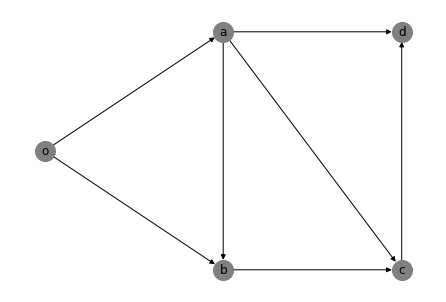

In [4]:
pos={'o': (0,1.5),'a': (1,3),'b': (1,0),'c': (2,0),'d': (2,3)}
nodeToInt={'o':0,'a':1,'b':2,'c':3,'d':4}
intToNode = {v:k for k,v in nodeToInt.items()}
nx.draw(G, pos, with_labels=True,node_color='grey',node_size=400)
plt.savefig("hw2_3.eps", format='eps')

## A - Proportional Rate

In [5]:
def particlePlacement_nodePersp_prop(lambda_matrix, nodeToInt_dict, time_units_avail, entrance_rate, n_nodes):
    w = np.sum(lambda_matrix, axis=1)
    w_star = np.max(w)
    Q = lambda_matrix/w_star 
    Q = Q + np.diag(np.ones(len(w))-np.sum(Q,axis=1))
    Q_cum = np.cumsum(Q, axis=1)
    
    #initialize the count of particles on nodes
    particleCount_node=np.zeros(n_nodes) 
    #initialize the count of particles on nodes history
    particleCount_node_History=np.zeros((1,n_nodes))
    #count of particles in the network
    n_particles=0
    #array of timestamps when a tick results in an action
    time_units=[0]
    #total time counter
    t_tot=0
    
    #while there is time available
    while t_tot<time_units_avail:
        #compute tick of clock for particle entrance
        t_next_entrance=-np.log(np.random.rand())/(entrance_rate)
        #compute tick of clock for particle moving
        t_next_moving=np.inf
        #it is effectively computed only if there are particles in the network, 
        #otherwise particles need to get into the network first
        if(n_particles>0):
            t_next_moving=-np.log(np.random.rand())/(n_particles)
            
        #determine which clock ticked first
        if(t_next_entrance<t_next_moving):
            #if a particle enters
            t_tot +=t_next_entrance
            time_units.append(t_tot)
            n_particles+=1
            #add particle on node o
            particleCount_node[nodeToInt_dict['o']]+=1
            
            
        else:
            #if a particle is moved around the network
            t_tot +=t_next_moving
            time_units.append(t_tot)
            #choose node from which to move the particle
            node_pre=np.random.choice(n_nodes,p=particleCount_node/n_particles)
            #decrease particle count for the node
            particleCount_node[node_pre]-=1
            
            #if the node is not D, proceed to choose the destination node
            if (node_pre)!=nodeToInt_dict['d']:
                node_post = np.argwhere(Q_cum[node_pre] > np.random.rand())[0][0]
                particleCount_node[node_post]+=1
                
            #if the node is D, total particle count is decremented
            #note that particle count on the "pre" node was already decremented before
            else:
                n_particles-=1
        
        
        particleCount_node_History=np.vstack([particleCount_node_History, particleCount_node])
    
            
    return particleCount_node_History, time_units

### A.1

In [6]:
particleCount_node_History_prop, time_units=particlePlacement_nodePersp_prop(lambda_matrix, nodeToInt, 60, 1,  5)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Evolution of the proportional-rate system with input rate 1, for 60 time units


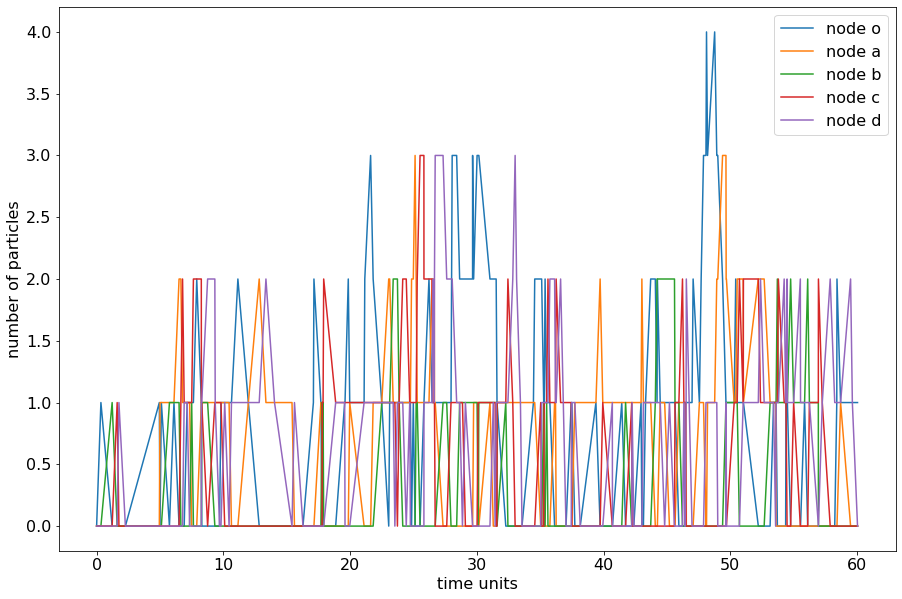

In [7]:
print("Evolution of the proportional-rate system with input rate 1, for 60 time units")
fig = plt.figure(1, figsize=(15,10))
ax = plt.subplot(111)

for node in range(5):
    trajectory = particleCount_node_History_prop[:,node]
    ax.plot(time_units, trajectory, label="node "+intToNode[node])
    plt.xlabel("time units")
    plt.ylabel("number of particles")
    
ax.legend()
plt.savefig("hw2_3_a1.eps", format='eps')

### A.2

Evolution of the proportional-rate system with varying input rate, for 60 time units


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


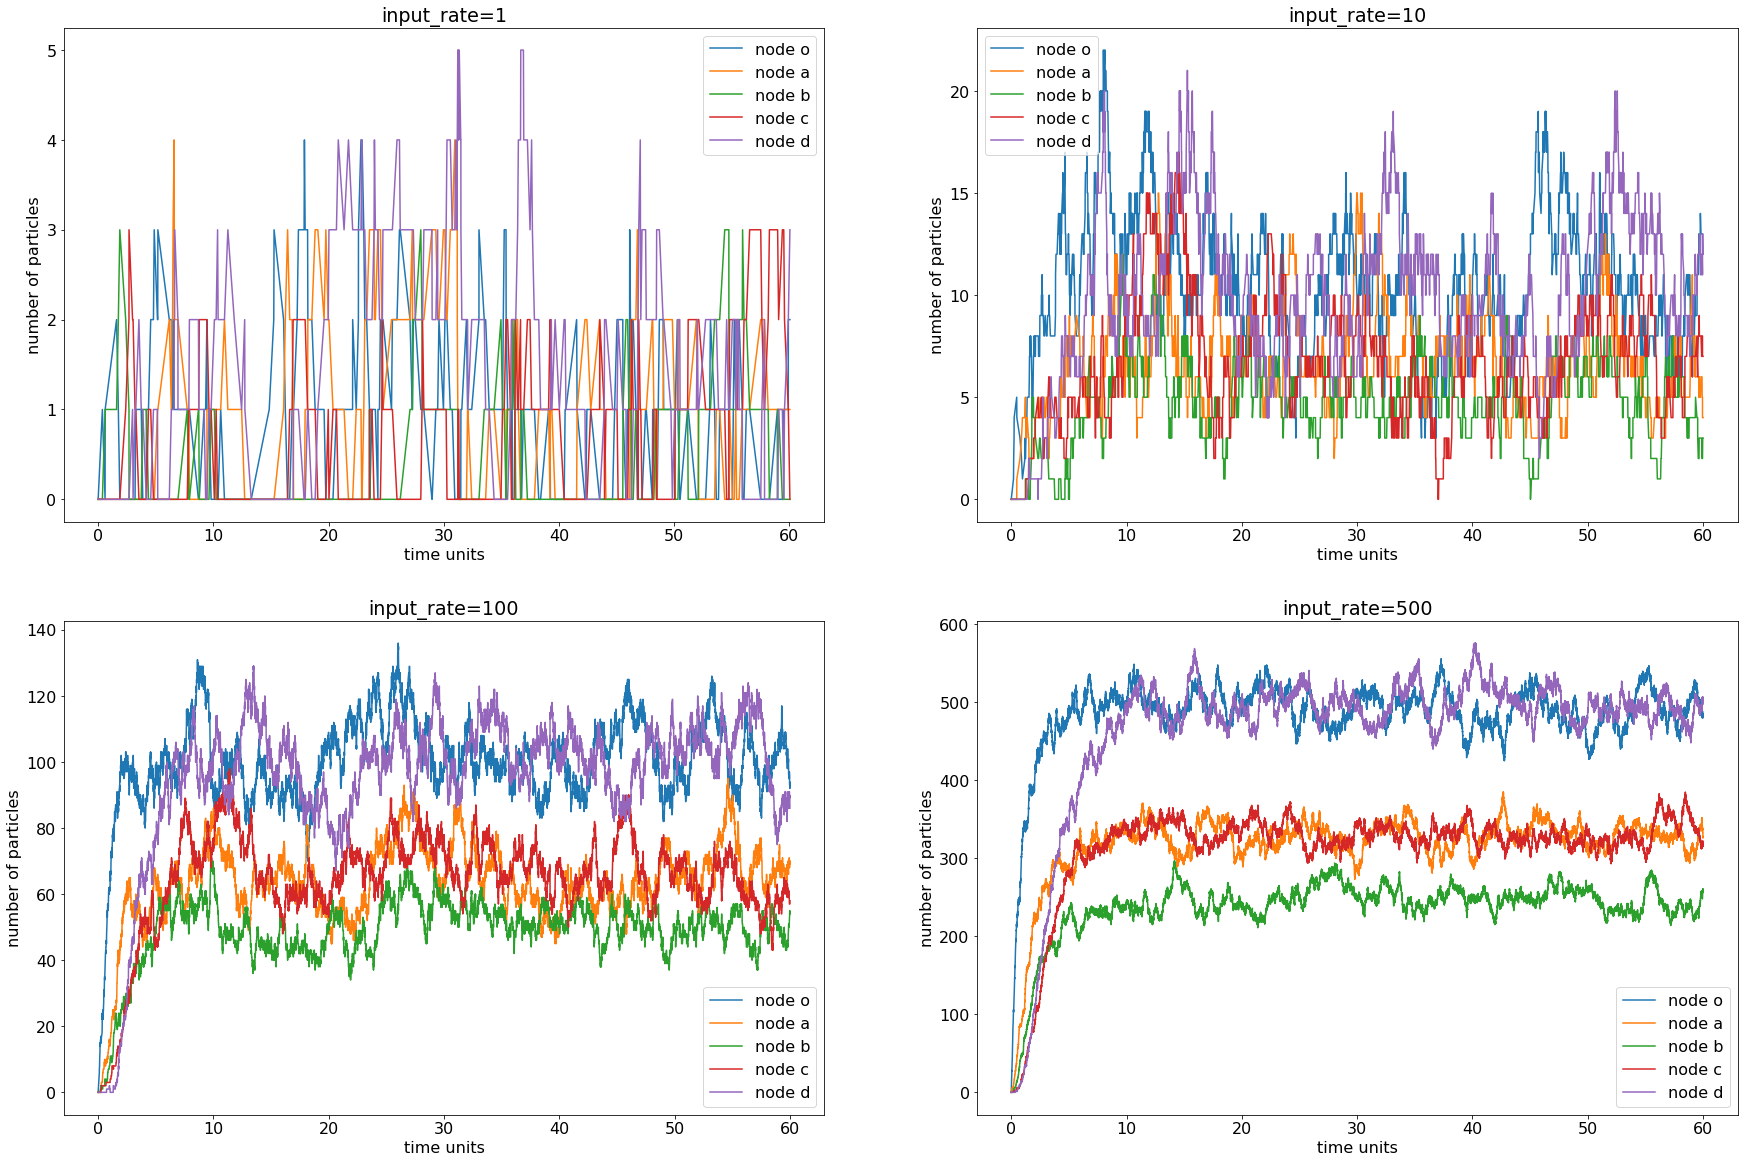

In [8]:
print("Evolution of the proportional-rate system with varying input rate, for 60 time units")
#to determine blow up, visually, the dynamics is simulated for different input rates
input_rates=[1,10,100,500]
fig, axs = plt.subplots(2,2, figsize=(30,20))

i=0
j=0
for input_rate in input_rates:
    particleCount_node_History_fixed, time_units=particlePlacement_nodePersp_prop(lambda_matrix, nodeToInt, 60, input_rate,  5)
    

    for node in range(5):
        trajectory = particleCount_node_History_fixed[:,node]
        axs[i, j].plot(time_units,trajectory, label="node "+intToNode[node])
        axs[i, j].set_title("input_rate="+str(input_rate))
        axs[i, j].set_xlabel("time units")
        axs[i, j].set_ylabel("number of particles")
        
        axs[i, j].legend()
    j+=1
    if(j>1):
        j=0
        i+=1
    if(i>1):
        i=0
        j=0
plt.savefig("hw2_3_a2.eps", format='eps')

## B - Fixed Rate

In [9]:
def particlePlacement_nodePersp_fixed(lambda_matrix, nodeToInt_dict, time_units_avail, entrance_rate, n_nodes):
    w = np.sum(lambda_matrix, axis=1)
    w_star = np.max(w)
    Q = lambda_matrix/w_star 
    Q = Q + np.diag(np.ones(len(w))-np.sum(Q,axis=1))
    Q_cum = np.cumsum(Q, axis=1)
    
    #initialize position of particles
    particleCount_node=np.zeros(n_nodes)
    #initialize the count of particles on nodes history
    particleCount_node_History=np.zeros((1,n_nodes))
    #count of particles in the network
    n_particles=0
    #array of timestamps when a tick results in an action
    time_units=[0]
    #total time counter
    t_tot=0
    
    #while there is time available
    while t_tot<time_units_avail:
        #compute tick of clock for particle entrance
        t_next_entrance=-np.log(np.random.rand())/(entrance_rate)
        #compute tick of clock for particle moving
        t_next_moving=np.inf
        #it is effectively computed only if there are particles in the network, 
        #otherwise particles need to get into the network first
        if(n_particles>0):
            t_next_moving=-np.log(np.random.rand())/(n_nodes)
            
        #determine which clock ticked first
        if(t_next_entrance<t_next_moving):
            #if a particle enters
            t_tot +=t_next_entrance
            time_units.append(t_tot)
            n_particles+=1
            #add particle on node o
            particleCount_node[nodeToInt_dict['o']]+=1
            
            
        else:
            #if a particle is moved around the network
            t_tot +=t_next_moving
            time_units.append(t_tot)
            
            #choose node from which to move the particle
            node_pre=np.random.choice(n_nodes)
            if(particleCount_node[node_pre]>0):
                #decrease particle count for the node
                particleCount_node[node_pre]-=1
                
                #if the node is not D, proceed to choose the destination node
                if (node_pre)!=nodeToInt_dict['d']:
                    node_post = np.argwhere(Q_cum[node_pre] > np.random.rand())[0][0]
                    particleCount_node[node_post]+=1
                    
                #if the node is D, total particle count is decremented
                #note that particle count on the "pre" node was already decremented before
                else:
                    n_particles-=1
        
        
        particleCount_node_History=np.vstack([particleCount_node_History, particleCount_node])
    
    return particleCount_node_History, time_units

### B.1

In [10]:
particleCount_node_History_fixed, time_units=particlePlacement_nodePersp_fixed(lambda_matrix, nodeToInt, 60, 1,  5)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Evolution of the fixed-rate system with input rate 1, for 60 time units


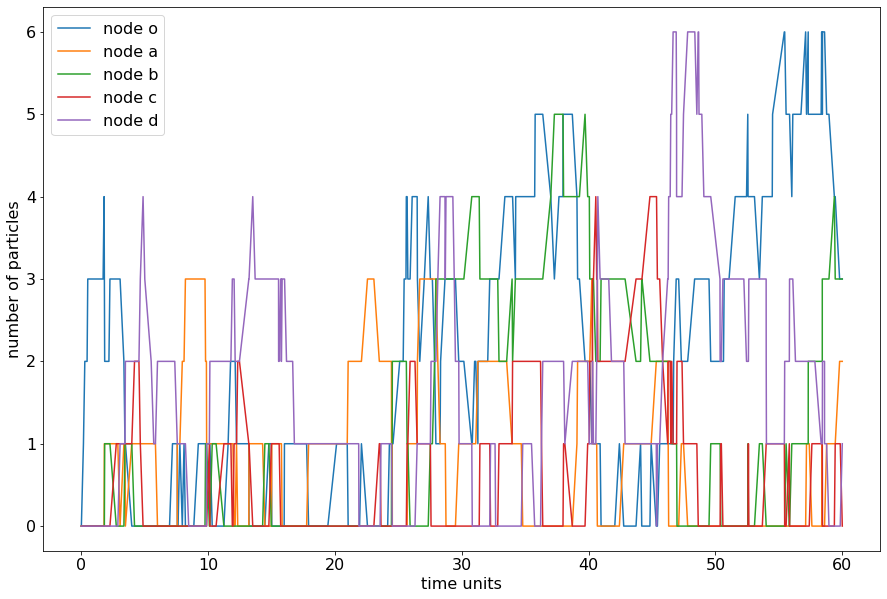

In [11]:
print("Evolution of the fixed-rate system with input rate 1, for 60 time units")
fig = plt.figure(1, figsize=(15,10))
ax = plt.subplot(111)

for node in range(5):
    trajectory = particleCount_node_History_fixed[:,node]
    ax.plot(time_units,trajectory, label="node "+intToNode[node])
    plt.xlabel("time units")
    plt.ylabel("number of particles")
    
ax.legend()
plt.savefig("hw2_3_b1.eps", format='eps')

### B.2

Evolution of the fixed-rate system with varying input rate, for 60 time units


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

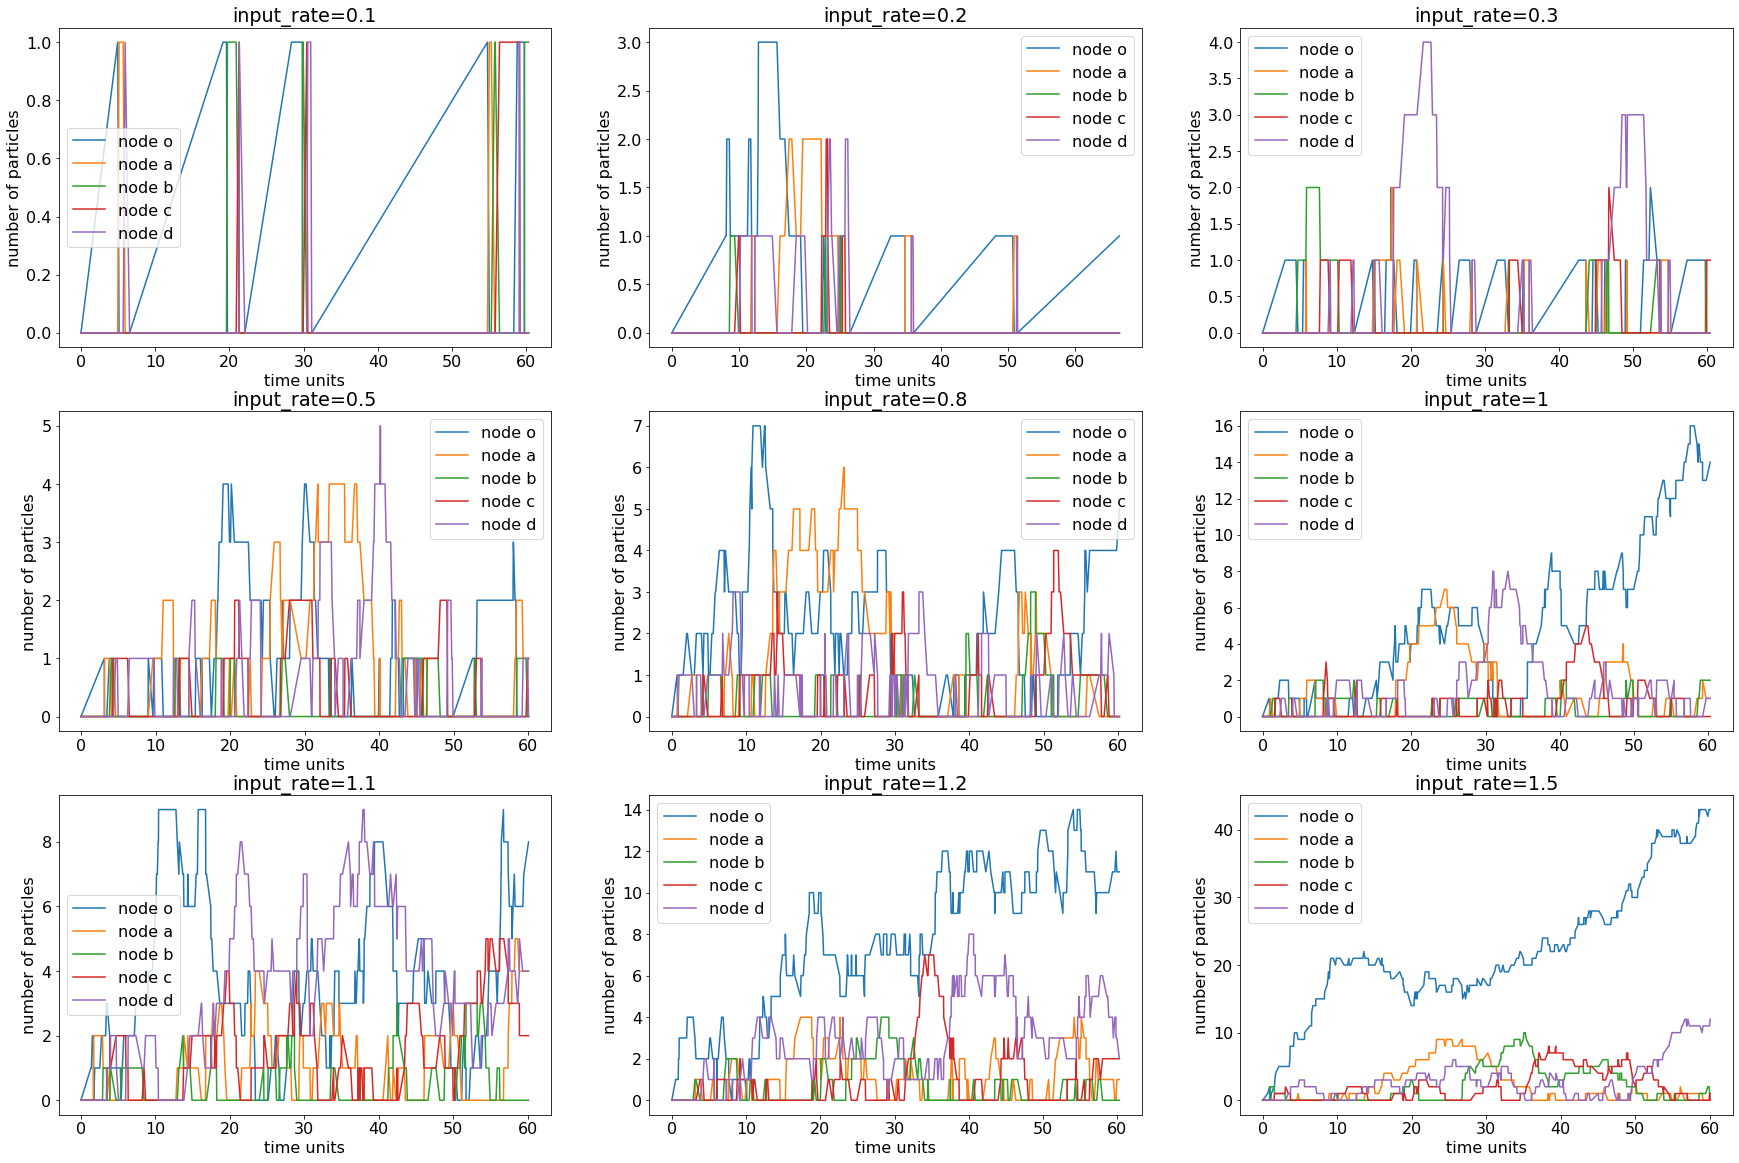

In [12]:
print("Evolution of the fixed-rate system with varying input rate, for 60 time units")
#to determine blow up, visually, the dynamics is simulated for different input rates
input_rates=[0.1,0.2,0.3, 0.5,0.8,1,1.1,1.2,1.5]
fig, axs = plt.subplots(3,3, figsize=(30,20))

i=0
j=0
for input_rate in input_rates:
    particleCount_node_History_fixed, time_units=particlePlacement_nodePersp_fixed(lambda_matrix, nodeToInt, 60, input_rate,  5)
    

    for node in range(5):
        trajectory = particleCount_node_History_fixed[:,node]
        axs[i, j].plot(time_units,trajectory, label="node "+intToNode[node])
        axs[i, j].set_title("input_rate="+str(input_rate))
        axs[i, j].set_xlabel("time units")
        axs[i, j].set_ylabel("number of particles")
        
        axs[i, j].legend()
    j+=1
    if(j>2):
        j=0
        i+=1
    if(i>2):
        i=0
        j=0
plt.savefig("hw2_3_b2.eps", format='eps')